In [10]:
import numpy as np

import os
import time
import sys
import io

import nltk
from nltk.corpus import stopwords

In [67]:
x_train=[]
with io.open('F:/Yelp Data/Processed Data/x_train.txt','r',encoding='utf-8',newline='\n') as f:
    for lines in f:
        lines=lines.lower()
        x_train.append(lines)

In [68]:
x_test=[]
with io.open('F:/Yelp Data/Processed Data/x_test.txt','r',encoding='utf-8',newline='\n') as f:
    for lines in f:
        lines=lines.lower()
        x_test.append(lines)

In [69]:
y_train=[]
with io.open('F:/Yelp Data/Processed Data/yelp_train_labels.txt','r',encoding='utf-8') as f:
    for y in f:
        y_train.append(int(y.strip()))

In [70]:
y_test=[]
with io.open('F:/Yelp Data/Processed Data/yelp_test_labels.txt','r',encoding='utf-8') as f:
    for y in f:
        y_test.append(int(y.strip()))

In [71]:
## Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
cv.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [72]:
len(cv.vocabulary_)

114966

In [73]:
##Encode document
cv_vec=cv.transform(x_train)

In [94]:
##Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

mnb=MultinomialNB(alpha=0.1)
mnb.fit(cv_vec,np.array(y_train))

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [95]:
y_pred=mnb.predict(cv_vec)

In [96]:
def accuracy(pred,truth):
    cnt=0
    for i in range(len(pred)):
        if(pred[i]==truth[i]):
            cnt+=1
    return cnt/len(pred)

In [97]:
print('CV Train Accuracy: {}'.format(accuracy(y_pred,y_train)))

CV Train Accuracy: 0.8883255330213209


In [98]:
##Test Accuracy
cv_test=cv.transform(x_test)
y_pred=mnb.predict(cv_test)

In [99]:
print('CV Test Accuracy: {}'.format(accuracy(y_pred,np.array(y_test))))

CV Test Accuracy: 0.85755


In [100]:
##Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
tn=conf_mat[0,0]
fn=conf_mat[0,1]
tp=conf_mat[1,1]
fp=conf_mat[1,0]
print("True Positive: "+str(tp))
print("True Negative: "+str(tn))
print("False Positive: "+str(fp))
print("False Negative: "+str(fn))

True Positive: 8565
True Negative: 8586
False Positive: 1450
False Negative: 1399


In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=['Class NO', 'Class YES']))

              precision    recall  f1-score   support

    Class NO       0.86      0.86      0.86      9985
   Class YES       0.86      0.86      0.86     10015

   micro avg       0.86      0.86      0.86     20000
   macro avg       0.86      0.86      0.86     20000
weighted avg       0.86      0.86      0.86     20000



In [102]:
print("ROC AUC score: %.4f" %roc_auc_score(y_test,mnb.predict_proba(cv_test)[:,1]))

ROC AUC score: 0.9194


In [103]:
from sklearn.metrics import roc_curve, auc
y_prob=mnb.predict_proba(cv_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

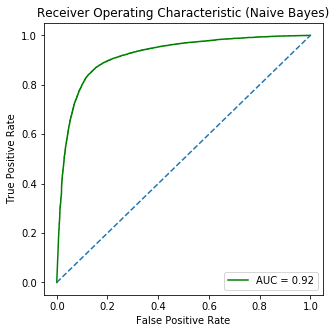

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic (Naive Bayes)')
plt.plot(false_positive_rate,true_positive_rate, color='green',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [105]:
##Tf-Idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(min_df=3)

tfidf.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [106]:
##Encode document
tf_vec=tfidf.transform(x_train)

In [107]:
##Using tfidf
mnb_idf=MultinomialNB(alpha=0.1)
mnb_idf.fit(tf_vec,y_train)
y_pred=mnb_idf.predict(tf_vec)

In [108]:
print('Tfidf Train Accuracy: {}'.format(accuracy(y_pred,y_train)))

Tfidf Train Accuracy: 0.890998764950598


In [109]:
##Test Accuracy
tf_test=tfidf.transform(x_test)
y_pred=mnb_idf.predict(tf_test)

In [110]:
print('Tfidf Test Accuracy: {}'.format(accuracy(y_pred,y_test)))

Tfidf Test Accuracy: 0.8637


In [111]:
##Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
tn=conf_mat[0,0]
fn=conf_mat[0,1]
tp=conf_mat[1,1]
fp=conf_mat[1,0]
print("True Positive: "+str(tp))
print("True Negative: "+str(tn))
print("False Positive: "+str(fp))
print("False Negative: "+str(fn))

True Positive: 8568
True Negative: 8706
False Positive: 1447
False Negative: 1279


In [112]:
from sklearn.metrics import roc_curve, auc
y_prob=mnb_idf.predict_proba(tf_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

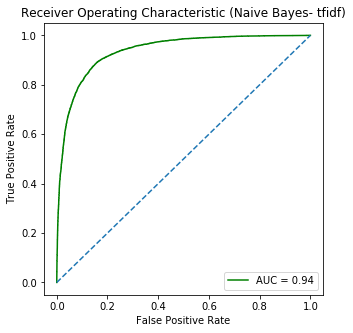

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic (Naive Bayes- tfidf)')
plt.plot(false_positive_rate,true_positive_rate, color='green',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()